In [43]:
import re
import json
import pandas as pd

In [2]:
with open('results.txt', 'r') as file:
    results = file.readlines()

In [40]:
params = []
for line in results:
    params.extend(re.findall("^\{.*$", line))
params

["{'cell_type': 'rnn', 'attention_model': ['BA'], 'window_source_size': 48, 'hs': 12}",
 "{'cell_type': 'rnn', 'attention_model': ['BA'], 'window_source_size': 48, 'hs': 24}",
 "{'cell_type': 'rnn', 'attention_model': ['BA'], 'window_source_size': 48, 'hs': 48}",
 "{'cell_type': 'rnn', 'attention_model': ['BA'], 'window_source_size': 96, 'hs': 12}",
 "{'cell_type': 'rnn', 'attention_model': ['BA'], 'window_source_size': 96, 'hs': 24}",
 "{'cell_type': 'rnn', 'attention_model': ['BA'], 'window_source_size': 96, 'hs': 48}",
 "{'cell_type': 'rnn', 'attention_model': ['BA'], 'window_source_size': 192, 'hs': 12}",
 "{'cell_type': 'rnn', 'attention_model': ['BA'], 'window_source_size': 192, 'hs': 24}",
 "{'cell_type': 'rnn', 'attention_model': ['BA'], 'window_source_size': 192, 'hs': 48}",
 "{'cell_type': 'rnn', 'attention_model': ['BA'], 'window_source_size': 336, 'hs': 12}",
 "{'cell_type': 'rnn', 'attention_model': ['BA'], 'window_source_size': 336, 'hs': 24}",
 "{'cell_type': 'rnn', 'att

In [41]:
MAE = []
for line in results:
    MAE.extend(re.findall("(?<=MAPE: )[0-9.]+", line))
MAE

['805.8112409379747',
 '930.9549183921208',
 '929.0853279053218',
 '787.0263145783819',
 '914.9275828901543',
 '885.4131763259091',
 '744.9083957750611',
 '883.224170480736',
 '863.9754923125844',
 '711.0213887467344',
 '833.594484247713',
 '835.48942282261',
 '944.2074826558431',
 '973.7299074445452',
 '1022.3003428020174',
 '931.9817204303052',
 '957.5499401475531',
 '1001.5048454621709',
 '905.321121749564',
 '924.3570042362919',
 '979.371450636122',
 '857.4565050826113',
 '887.0185987032377',
 '953.7012902610322',
 '636.2142204405769',
 '755.0639215651013',
 '778.5305110689194',
 '606.170284884043',
 '731.8918206854518',
 '739.9420162645209',
 '587.9414063912851',
 '697.3914654578691',
 '714.0811628490809',
 '599.5864134405414',
 '675.0743995079628',
 '657.3734934554141']

In [50]:
params = [json.loads(p.replace("\'", "\"")) for p in params]
params

AttributeError: 'dict' object has no attribute 'replace'

In [53]:
for i in range(len(params)):
    params[i]["MAE"] = float(MAE[i])

In [55]:
df = pd.DataFrame.from_records(params)

cell_type
gru     AxesSubplot(0.125,0.11;0.775x0.77)
lstm    AxesSubplot(0.125,0.11;0.775x0.77)
rnn     AxesSubplot(0.125,0.11;0.775x0.77)
Name: MAE, dtype: object

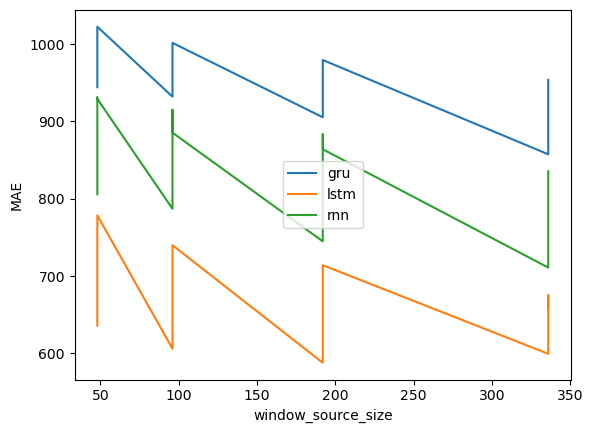

In [71]:
df.set_index('window_source_size').groupby('cell_type')['MAE'].plot(ylabel="MAE", legend=True)

cell_type
gru     AxesSubplot(0.125,0.11;0.775x0.77)
lstm    AxesSubplot(0.125,0.11;0.775x0.77)
rnn     AxesSubplot(0.125,0.11;0.775x0.77)
Name: MAE, dtype: object

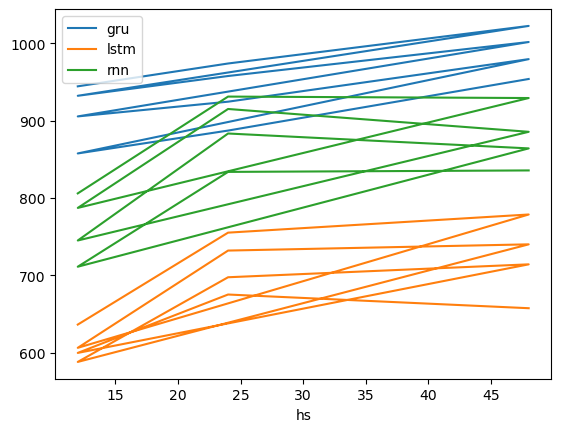

In [70]:
df.set_index('hs').groupby('cell_type')['MAE'].plot(legend=True)

In [72]:
import seaborn as sns

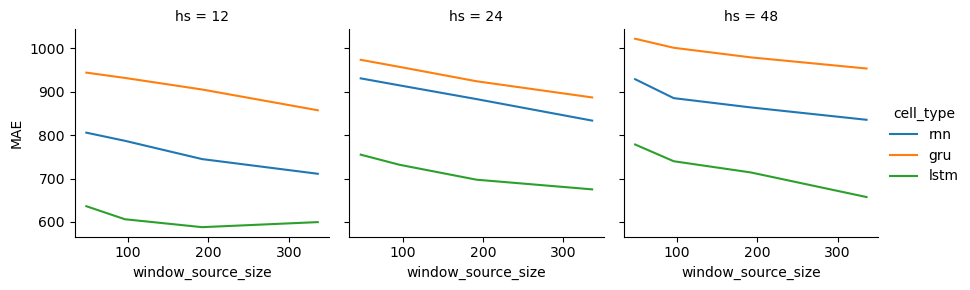

In [87]:
g = sns.FacetGrid(df, col='hs', hue='cell_type')
g.map(sns.lineplot, 'window_source_size', 'MAE')
g.add_legend()